Scenario I with dataset Women

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

Error importing in API mode: ImportError("dlopen(/Users/itdivisions/miniconda3/envs/mon_env/lib/python3.10/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): symbol not found in flat namespace '_R_BaseEnv'")
Trying to import in ABI mode.


In [3]:
# import data set 
# Choose 33 for CRAN 


utils = importr('utils')
utils.install_packages('TH.data')

th_data = importr('TH.data')
ro.r('data("bodyfat")')
bodyfat = ro.r['bodyfat']

df = pandas2ri.rpy2py(bodyfat)
df.to_csv('bodyfat_women.csv', index=False)

--- SVP sélectionnez un miroir CRAN pour cette session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]                   2: Australia (Canberra) [https]   
 3: Australia (Melbourne 1) [https]   4: Australia (Melbourne 2) [https]
 5: Austria (Wien) [https]            6: Belgium (Brussels) [https]     
 7: Brazil (PR) [https]               8: Brazil (SP 1) [https]          
 9: Brazil (SP 2) [https]            10: Bulgaria [https]               
11: Canada (MB) [https]              12: Canada (ON 1) [https]          
13: Canada (ON 2) [https]            14: Chile (Santiago) [https]       
15: China (Beijing 1) [https]        16: China (Beijing 2) [https]      
17: China (Beijing 3) [https]        18: China (Hefei) [https]          
19: China (Hong Kong) [https]        20: China (Jinan) [https]          
21: China (Lanzhou) [https]          22: China (Nanjing) [https]        
23: China (Shanghai 2) [https]       24: China (Shenzhen) [https]       
25: China (Wuhan) [https]            26: Co

R callback write-console: essai de l'URL 'https://mirror.ibcp.fr/pub/CRAN/bin/macosx/big-sur-x86_64/contrib/4.5/TH.data_1.1-5.tgz'
  
R callback write-console: Content type 'application/x-gzip'  
R callback write-console:  length 8761256 bytes (8.4 MB)
  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console


Les packages binaires téléchargés sont dans
	/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T//RtmpTpbFay/downloaded_packages


R callback write-console: De plus :   
R callback write-console: Message d'avis :
  
R callback write-console: Dans doTryCatch(return(expr), name, parentenv, handler) :  
R callback write-console: 
   
R callback write-console:  impossible de charger l'objet partagé '/Library/Frameworks/R.framework/Resources/modules//R_X11.so' :
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <D875E327-716F-321C-8684-B35029F4C85E> /Library/Frameworks/R.framework/Versions/4.5-x86_64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)
  


In [4]:
print(df.head())
print(df.info())

     age  DEXfat  waistcirc  hipcirc  elbowbreadth  kneebreadth  anthro3a  \
47  57.0   41.68      100.0    112.0           7.1          9.4      4.42   
48  65.0   43.29       99.5    116.5           6.5          8.9      4.63   
49  59.0   35.41       96.0    108.5           6.2          8.9      4.12   
50  58.0   22.79       72.0     96.5           6.1          9.2      4.03   
51  60.0   36.42       89.5    100.5           7.1         10.0      4.24   

    anthro3b  anthro3c  anthro4  
47      4.95      4.50     6.13  
48      5.01      4.48     6.37  
49      4.74      4.60     5.82  
50      4.48      3.91     5.66  
51      4.68      4.15     5.91  
<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 47 to 117
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           71 non-null     float64
 1   DEXfat        71 non-null     float64
 2   waistcirc     71 non-null     float64
 3   hipcirc      

##### Now we are going to follow the STRATEGY FOR VARIABLE SELECTION AND MODEL BUILDING from the Montgomery et al book

### 1) Fit the largest model possible to the data 

In [5]:
# linear regression on all the data available 

X=df.drop('DEXfat',axis=1)
y=df['DEXfat']

# model
X_with_const = sm.add_constant(X) # to add intercept 
model_full = sm.OLS(y, X_with_const).fit() # use of sm to get a simple linear reg
print(model_full.summary())





                            OLS Regression Results                            
Dep. Variable:                 DEXfat   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sam, 31 jan 2026   Prob (F-statistic):           1.39e-30
Time:                        13:02:25   Log-Likelihood:                -179.71
No. Observations:                  71   AIC:                             379.4
Df Residuals:                      61   BIC:                             402.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -69.0283      7.517     -9.183   

### 2) Perform a thorough analysis of this model.

• What regressors seem important?

• Are there possible outliers?

• Is there a need to transform the response?

• Do any of the regressors need transformations?

<b><span style="color:red;">Note: potentiellement verifier avec un TA interpretation des plots pour être sures</span></b>


/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

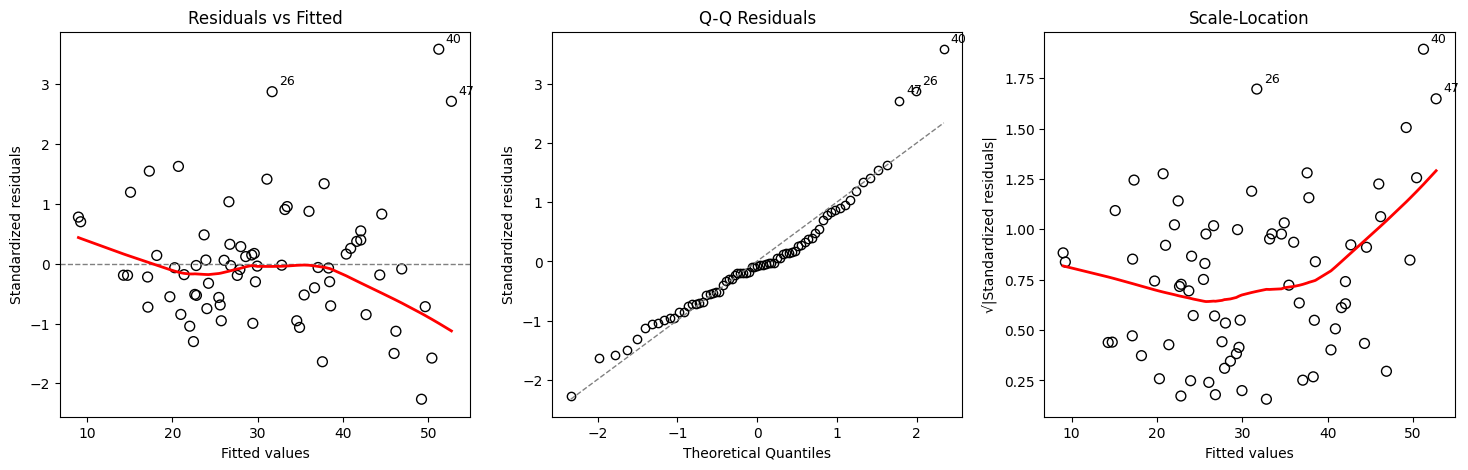

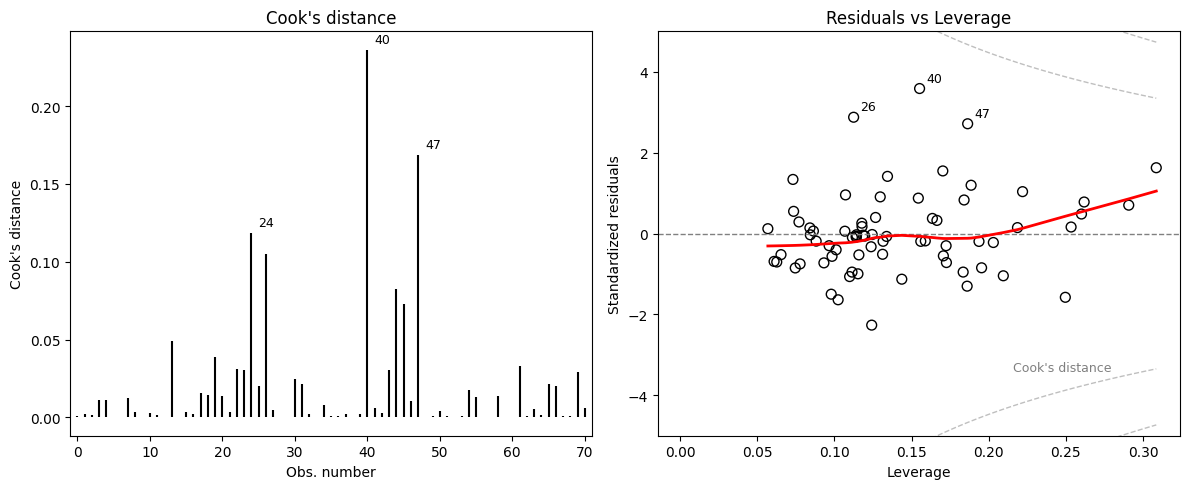

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence



def diagnostic(model=model_full):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig1, axes1 = plt.subplots(1, 2, figsize=(12, 5))
    fitted = model.fittedvalues
    residuals = model.resid
    influence = OLSInfluence(model)

    standardized_resid = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]

    from statsmodels.nonparametric.smoothers_lowess import lowess

    # 1. Residuals vs Fitted
    axes[0].scatter(fitted, standardized_resid, edgecolors='black', facecolors='none', s=50)
    axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
    lowess_result = lowess(standardized_resid, fitted, frac=0.66)
    axes[0].plot(lowess_result[:, 0], lowess_result[:, 1], color='red', linewidth=2)
    abs_resid = np.abs(standardized_resid)
    top_indices = np.argsort(abs_resid)[-3:][::-1]  
    for idx in top_indices:
        axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[0].set_xlabel('Fitted values')
    axes[0].set_ylabel('Standardized residuals')
    axes[0].set_title('Residuals vs Fitted')

    # 2. Q-Q plot
    from scipy import stats
    standardized_resid_array = np.array(standardized_resid)
    (osm, osr), (slope, intercept, r) = stats.probplot(standardized_resid_array, dist="norm", fit=True)
    axes[1].plot(osm, osr, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6)
    axes[1].plot(osm, slope * osm + intercept, 'gray', linestyle='--', linewidth=1)
    sorted_indices = np.argsort(standardized_resid_array)
    for i, idx in enumerate(top_indices):
        pos = np.where(sorted_indices == idx)[0][0]
        axes[1].annotate(str(idx), (osm[pos], osr[pos]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Standardized residuals')
    axes[1].set_title('Q-Q Residuals')

    # 3. Scale-Location
    sqrt_std_resid = np.sqrt(np.abs(standardized_resid))
    axes[2].scatter(fitted, sqrt_std_resid, edgecolors='black', facecolors='none', s=50)
    lowess_result_sl = lowess(sqrt_std_resid, fitted, frac=0.66)
    axes[2].plot(lowess_result_sl[:, 0], lowess_result_sl[:, 1], color='red', linewidth=2)
    top_indices_sl = np.argsort(sqrt_std_resid)[-3:][::-1]
    for idx in top_indices_sl:
        axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[2].set_xlabel('Fitted values')
    axes[2].set_ylabel('√|Standardized residuals|')
    axes[2].set_title('Scale-Location')

    plt.tight_layout()

    # 4. Cook's distance
    n = len(cooks_d)
    axes1[0].stem(range(n), cooks_d, linefmt='black', markerfmt=' ', basefmt=' ')
    top_cooks = np.argsort(cooks_d)[-3:][::-1]
    for idx in top_cooks:
        axes1[0].annotate(str(idx), (idx, cooks_d[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes1[0].set_xlabel('Obs. number')
    axes1[0].set_ylabel("Cook's distance")
    axes1[0].set_title("Cook's distance")
    axes1[0].set_xlim(-1, n)

    # 5. Residuals vs Leverage
    axes1[1].scatter(leverage, standardized_resid, edgecolors='black', facecolors='none', s=50)
    axes1[1].axhline(0, color='gray', linestyle='--', linewidth=1)
    lowess_result_lev = lowess(standardized_resid, leverage, frac=0.66)
    axes1[1].plot(lowess_result_lev[:, 0], lowess_result_lev[:, 1], color='red', linewidth=2)
    p = model_full.df_model + 1
    x_lev = np.linspace(0.001, max(leverage), 100)
    for cd_value in [0.5, 1.0]:
        y_upper = np.sqrt(cd_value * p * (1 - x_lev) / x_lev)
        y_lower = -y_upper
        axes1[1].plot(x_lev, y_upper, color='gray', linestyle='--', alpha=0.5, linewidth=1)
        axes1[1].plot(x_lev, y_lower, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    axes1[1].text(max(leverage) * 0.7, min(standardized_resid)*1.5, "Cook's distance", color='gray', fontsize=9)
    for idx in top_indices:
        axes1[1].annotate(str(idx), (leverage[idx], standardized_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes1[1].set_xlabel('Leverage')
    axes1[1].set_ylabel('Standardized residuals')
    axes1[1].set_title('Residuals vs Leverage')
    axes1[1].set_ylim(-5,5)
    plt.tight_layout()
    plt.show()

diagnostic(model_full)



OBSERVATIONS:
1. Residuals vs Fitted:
The lowess curve shows a non-linear pattern (curved, not horizontal at 0), and the spread of residuals increases with fitted values, indicating heteroscedasticity (non-constant variance). Points 26, 40, and 47 have very high standardized residuals and appear as outliers that should be investigated.

2. Q-Q Plot:
Points 26, 40, and 47 deviate strongly from the theoretical normal line, particularly in the upper tail. This suggests that the residuals may not follow a normal distribution perfectly, likely due to these outlier observations. The majority of points follow the diagonal line reasonably well, indicating approximate normality for the rest of the data.

3. Scale-Location:
The lowess curve shows an upward trend, confirming heteroscedasticity (the variance of residuals increases with fitted values). Points 26, 40, and 47 have the highest √|standardized residuals|, indicating they are the most extreme observations in terms of residual magnitude.

4. Cook's Distance:
Point 40 has the highest Cook's distance (approximately 0.25), indicating it is the most influential observation. Points 24 and 47 also show elevated Cook's distance values. Using the cutoff of 4/n ≈ 0.056 (where n=71), these three points far exceed this threshold, suggesting they have substantial influence on the regression coefficients.
Note: Point 24 appears in this plot but not in the residual plots, indicating it has moderate residual combined with high leverage, making it influential. Point 26, despite having a large residual, has lower leverage and thus lower Cook's distance than point 24.

5. Residuals vs Leverage:
Point 40 has moderate leverage combined with the highest standardized residual, making it the most influential observation. Points 26 and 47 also have high standardized residuals with moderate leverage, making them influential outliers. All three points fall within the Cook's distance = 0.5 contour, but point 40 is closest to this boundary. The lowess curve shows the general trend of residuals across different leverage values.



#### Outliers, Influence Multicolinearity 

In [ ]:
# MULTICOLINEARITY
# VIF (cutoff = 10)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Condition Number (cutoff = 100)
corr_matrix = X.corr()
eigenvalues = np.linalg.eigvals(corr_matrix)
condition_number = np.max(eigenvalues) / np.min(eigenvalues)
print(f"Condition Number: {condition_number}")

# OUTLIERS & INFLUENCE 
n = len(y)
p = X.shape[1] + 1

# Cook's Distance (cutoff = F(0.5, p, n-p))
from scipy.stats import f
cooks_cutoff = f.ppf(0.5, p, n - p)
outliers_cooks = np.where(cooks_d > cooks_cutoff)[0]
print(f"Outliers selon Cook's distance: {outliers_cooks}")

# Leverage (cutoff = 2p/n)
leverage_cutoff = 2 * p / n
high_leverage = np.where(leverage > leverage_cutoff)[0]
print(f"High leverage points: {high_leverage}")

# CovRatio (|1 - CovRatio| > 3p/n)
covratio = influence.cov_ratio
covratio_cutoff = 3 * p / n
covratio_problems = np.where(np.abs(1 - covratio) > covratio_cutoff)[0]
print(f"CovRatio problems: {covratio_problems}")

       Variable          VIF
0           age    17.990074
1     waistcirc   196.430437
2       hipcirc   412.821926
3  elbowbreadth   161.830170
4   kneebreadth   297.402666
5      anthro3a  2655.261649
6      anthro3b  3734.295856
7      anthro3c   430.707277
8       anthro4  8205.668770
Condition Number: 981.1258525512803


NameError: name 'cooks_d' is not defined

### 3) Determine if a transformation of the response or of some of the regressors is necessary.

<b><span style="color:red;">Note: j'ai pas essayé plusieurs transfo et je pense pas avoir parfaitement fait cette partie. Aussi l'interpretation après avoir appliqué transfo pas ouf</span></b>


In [22]:
from scipy.stats import boxcox

# Box-Cox 
y_transformed, lambda_opt = boxcox(y)
print(f"Lambda optimal: {lambda_opt}")
 
# Re-fit 
model_transformed = sm.OLS(y_transformed, X_with_const).fit()
print(model_transformed.summary())

Lambda optimal: 0.4312907445456364
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sam, 31 jan 2026   Prob (F-statistic):           1.35e-33
Time:                        13:09:57   Log-Likelihood:                -34.013
No. Observations:                  71   AIC:                             88.03
Df Residuals:                      61   BIC:                             110.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

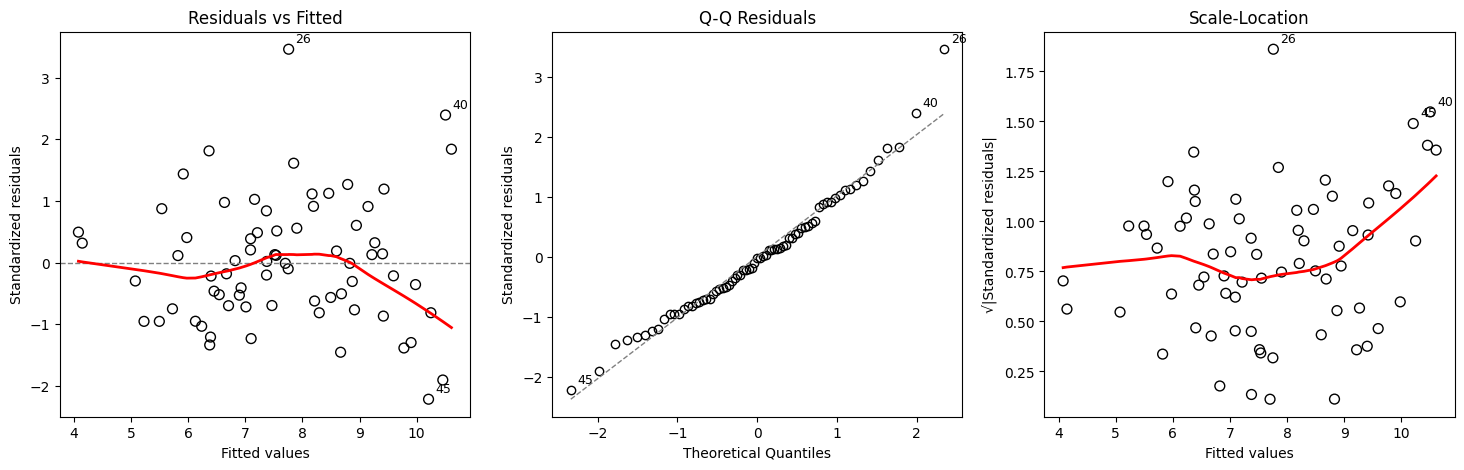

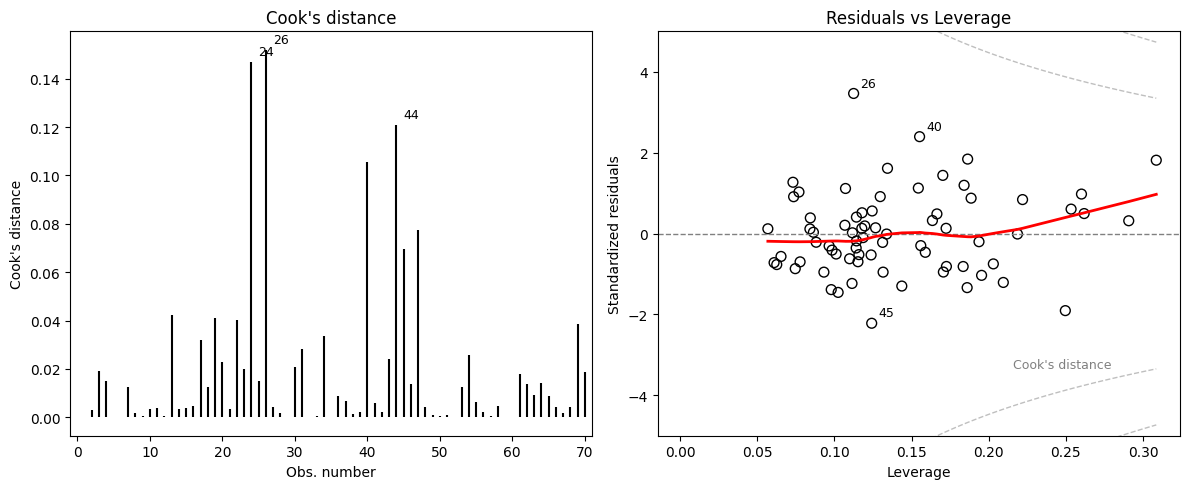

In [23]:
diagnostic(model_transformed)


/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_rf.annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_sl.annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

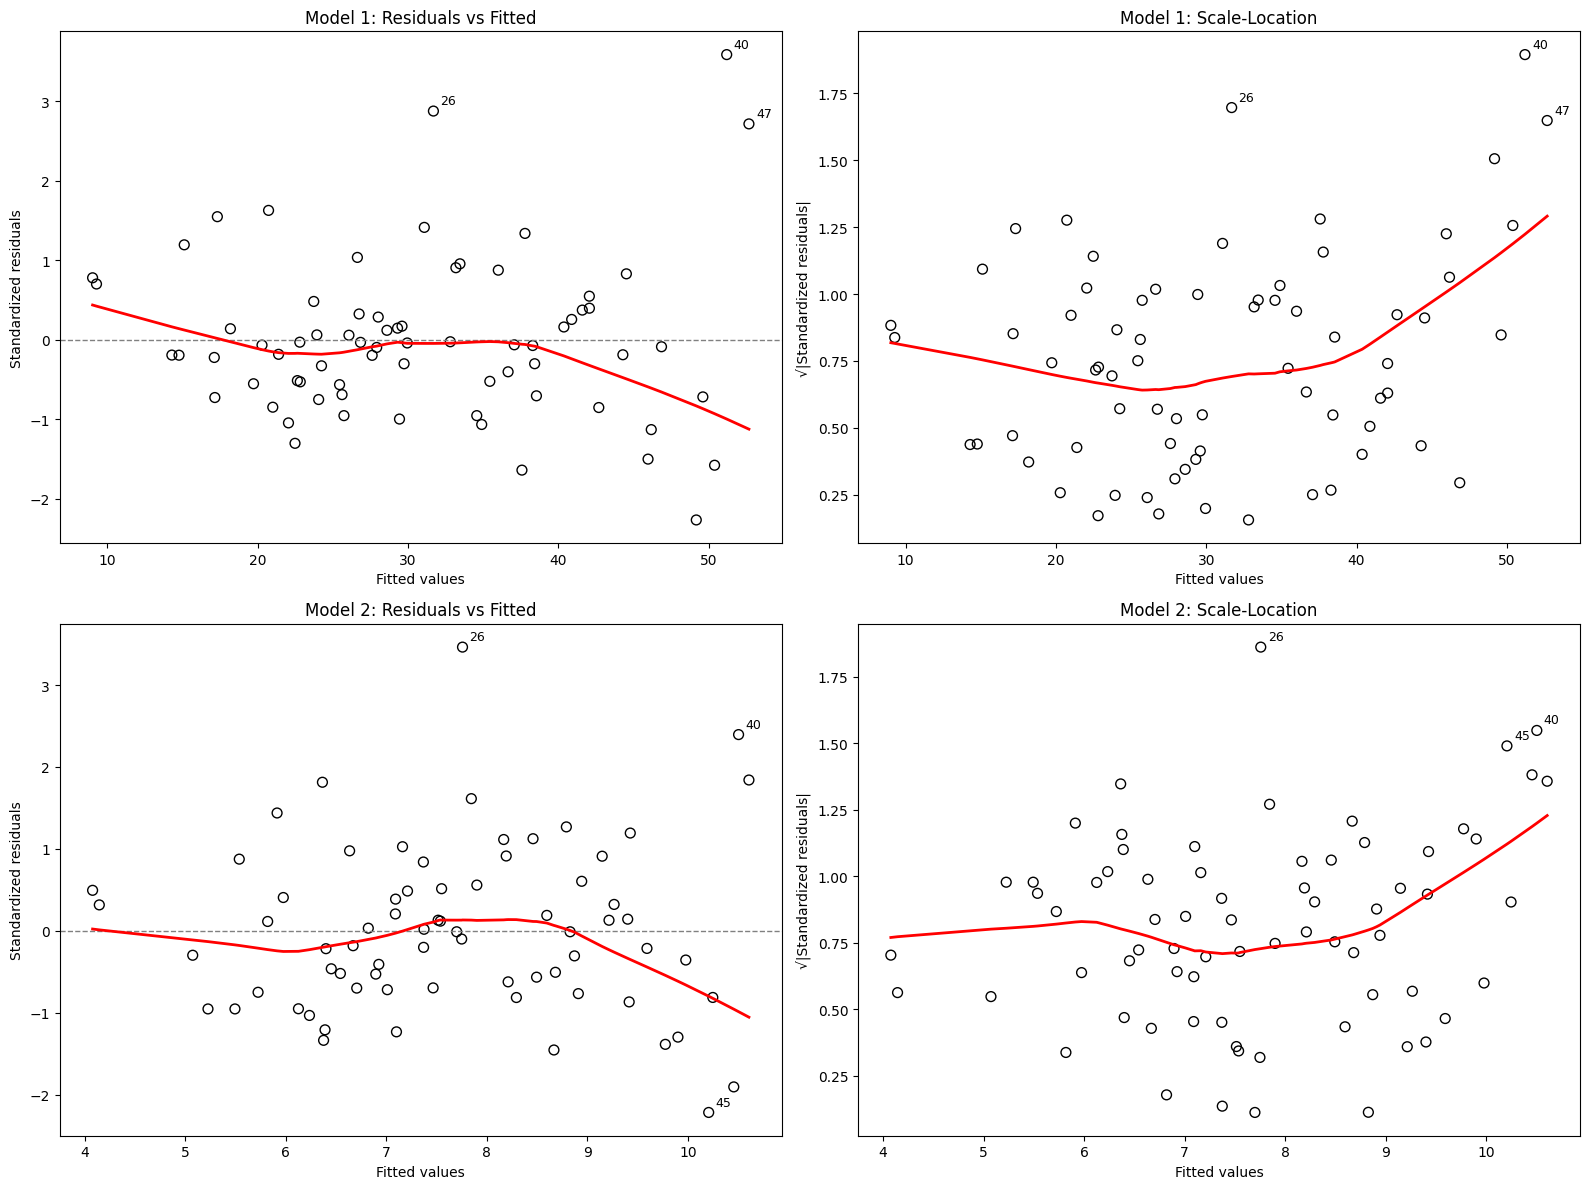

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.nonparametric.smoothers_lowess import lowess

def compare_transfo(model1, model2):
    models = {0: ('Model 1', model1), 1: ('Model 2', model2)}
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    for i, (name, model) in models.items():
        fitted = model.fittedvalues
        influence = OLSInfluence(model)
        standardized_resid = influence.resid_studentized_internal

        ax_rf = axes[i, 0]
        ax_rf.scatter(fitted, standardized_resid, edgecolors='black', facecolors='none', s=50)
        ax_rf.axhline(0, color='gray', linestyle='--', linewidth=1)
        lowess_result = lowess(standardized_resid, fitted, frac=0.66)
        ax_rf.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', linewidth=2)
        abs_resid = np.abs(standardized_resid)
        top_indices = np.argsort(abs_resid)[-3:][::-1]
        for idx in top_indices:
            ax_rf.annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]), 
                           xytext=(5,5), textcoords='offset points', fontsize=9)
        ax_rf.set_xlabel('Fitted values')
        ax_rf.set_ylabel('Standardized residuals')
        ax_rf.set_title(f'{name}: Residuals vs Fitted')

        ax_sl = axes[i, 1]
        sqrt_std_resid = np.sqrt(np.abs(standardized_resid))
        ax_sl.scatter(fitted, sqrt_std_resid, edgecolors='black', facecolors='none', s=50)
        lowess_result_sl = lowess(sqrt_std_resid, fitted, frac=0.66)
        ax_sl.plot(lowess_result_sl[:,0], lowess_result_sl[:,1], color='red', linewidth=2)
        top_indices_sl = np.argsort(sqrt_std_resid)[-3:][::-1]
        for idx in top_indices_sl:
            ax_sl.annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
                           xytext=(5,5), textcoords='offset points', fontsize=9)
        ax_sl.set_xlabel('Fitted values')
        ax_sl.set_ylabel('√|Standardized residuals|')
        ax_sl.set_title(f'{name}: Scale-Location')

    plt.tight_layout()
    plt.show()
compare_transfo(model_full,model_transformed)

The Box-Cox transformation with optimal λ = 0.40 showed mixed results. The transformation successfully reduced heteroscedasticity in the middle range of fitted values, particularly flattening the lowess curve for fitted values below 6 in the Scale-Location plot. However, the presence of extreme outliers (points 24, 26, and 40) overwhelms this improvement. This suggests that while Box-Cox addresses the underlying heteroscedasticity pattern in the bulk of the data, it cannot compensate for individual extreme observations that require separate treatment through removal or robust regression methods.

<b><span style="color:red;">Note: sûrement mieux de les afficher sur meme graphe ?</span></b>


### 4) Determine if all possible regressions are feasible.
- If all possible regressions are feasible, perform all possible regressions using
such criteria as Mallow ’ s C p adjusted R 2 , and the PRESS statistic to rank the
best subset models.
- If all possible regressions are not feasible, use stepwise selection techniques
to generate the largest model such that all possible regressions are feasible.
Perform all possible regressions as outlined above.

In [57]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd

# Function to evaluate model criteria
def evaluate_model(X, y, features):
    if len(features) == 0:
        return None
    
    X_subset = sm.add_constant(X[list(features)])
    model = sm.OLS(y, X_subset).fit()
    
    n = len(y)
    p = len(features) + 1  
    
    # Criteria
    aic = model.aic
    bic = model.bic
    adj_r2 = model.rsquared_adj
    
    # Mallows' Cp
    mse_full = model_full.mse_resid  
    sse = model.ssr
    cp = (sse / mse_full) - n + 2*p
    
    return {
        'features': features,
        'n_features': len(features),
        'AIC': aic,
        'BIC': bic,
        'Adj_R2': adj_r2,
        'Cp': cp
    }


feature_names = X.columns.tolist()
results = []

for k in range(1, len(feature_names) + 1):
    for subset in combinations(feature_names, k):
        result = evaluate_model(X, y, subset)
        if result:
            results.append(result)

results_df = pd.DataFrame(results)

# Top 5 models according to each criterion
print("Top 5 according to Cp:")
print(results_df.nsmallest(5, 'Cp'))
print("Best subset:",results_df.nsmallest(1, 'Cp').features)

print("\nTop 5 according to AIC:")
print(results_df.nsmallest(5, 'AIC'))
print("Best subset:",results_df.nsmallest(1, 'AIC').features)


print("\nTop 5 according to BIC:")
print(results_df.nsmallest(5, 'BIC'))
print("Best subset:",results_df.nsmallest(1, 'BIC').features)


print("\nTop 5 according to Adjusted R²:")
print(results_df.nlargest(5, 'Adj_R2'))
print("Best subset:",results_df.nlargest(1, 'Adj_R2').features)


print("Full model result: ",results_df[results_df["n_features"]==len(feature_names)])


Top 5 according to Cp:
                                              features  n_features  \
191        (waistcirc, hipcirc, kneebreadth, anthro3b)           4   
261   (age, waistcirc, hipcirc, kneebreadth, anthro3b)           5   
326  (waistcirc, hipcirc, elbowbreadth, kneebreadth...           5   
335  (waistcirc, hipcirc, kneebreadth, anthro3a, an...           5   
339  (waistcirc, hipcirc, kneebreadth, anthro3b, an...           5   

            AIC         BIC    Adj_R2        Cp  
191  371.579746  382.893145  0.915898  1.890697  
261  373.084049  386.660129  0.915199  3.453146  
326  373.243983  386.820063  0.915007  3.593986  
335  373.365693  386.941772  0.914862  3.701378  
339  373.530224  387.106303  0.914664  3.846846  
Best subset: 191    (waistcirc, hipcirc, kneebreadth, anthro3b)
Name: features, dtype: object

Top 5 according to AIC:
                                              features  n_features  \
191        (waistcirc, hipcirc, kneebreadth, anthro3b)           4 

for best subset: (waistcirc, hipcirc, kneebreadth, anthro3b) we have : 

AIC         BIC    Adj_R2        Cp  
371.579746  382.893145  0.915898  1.890697

for full regressors:

AIC         BIC   Adj_R2    Cp  
379.412515  402.039313  0.91174  10.0  

We can see here BIC (balance fit and model complexity) and Cp (SSE subset<<MSE full subset) have considerably decreased with best subset and AIC slight decrease. Adjust R squared has also slighty improved (model explans better variation). 


<b><span style="color:red;">Note: quantifier l'amélioration genre 5 fois plus petit pour Cp ect et interpretation ...</span></b>


### 5) Compare and contrast the best models recommended by each criterion.

### 6) Perform a thorough analysis of the “ best ” models (usually three to fi ve models).

### 7) Explore the need for further transformations.

### 8) Discuss with the subject - matter experts the relative advantages and disadvantages of the final set of models.